In [9]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# import the dataset provided into a variable
dataset = pd.read_csv('C:\heart.csv') 
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
#check for missing data and handle if found any
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [93]:
#no missing values found

#check how the dataset is statistically spread
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

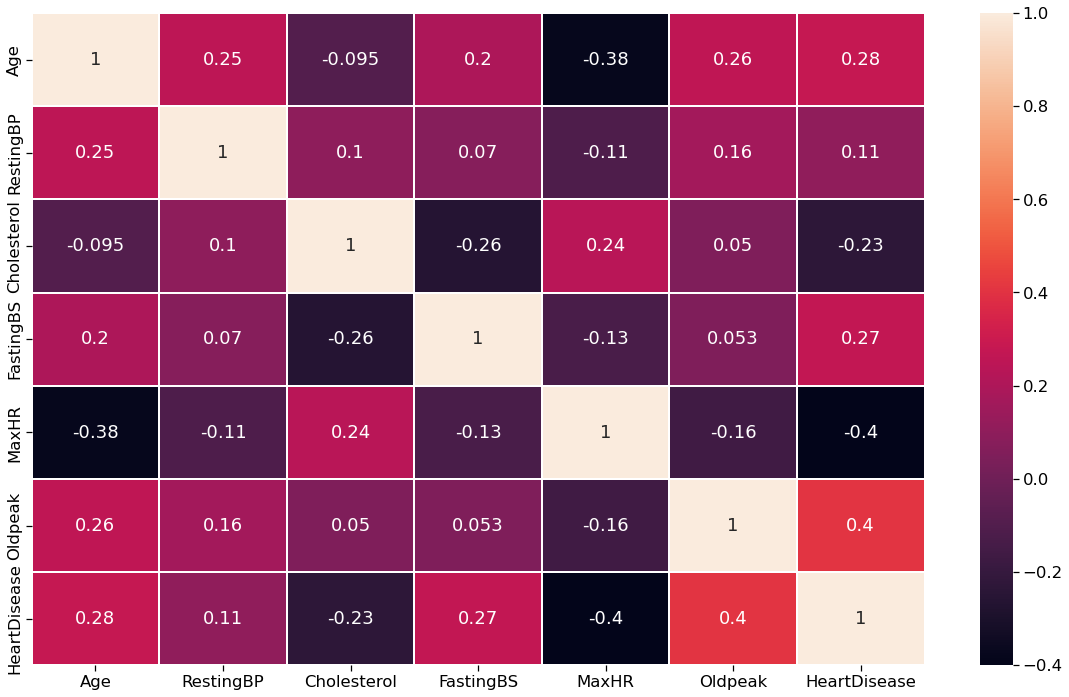

In [59]:
#Finding correlation among all the features

#Correlation Matrix
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(),annot=True,linewidth =2)

<AxesSubplot:title={'center':'Correlation with the HeartDisease feature'}>

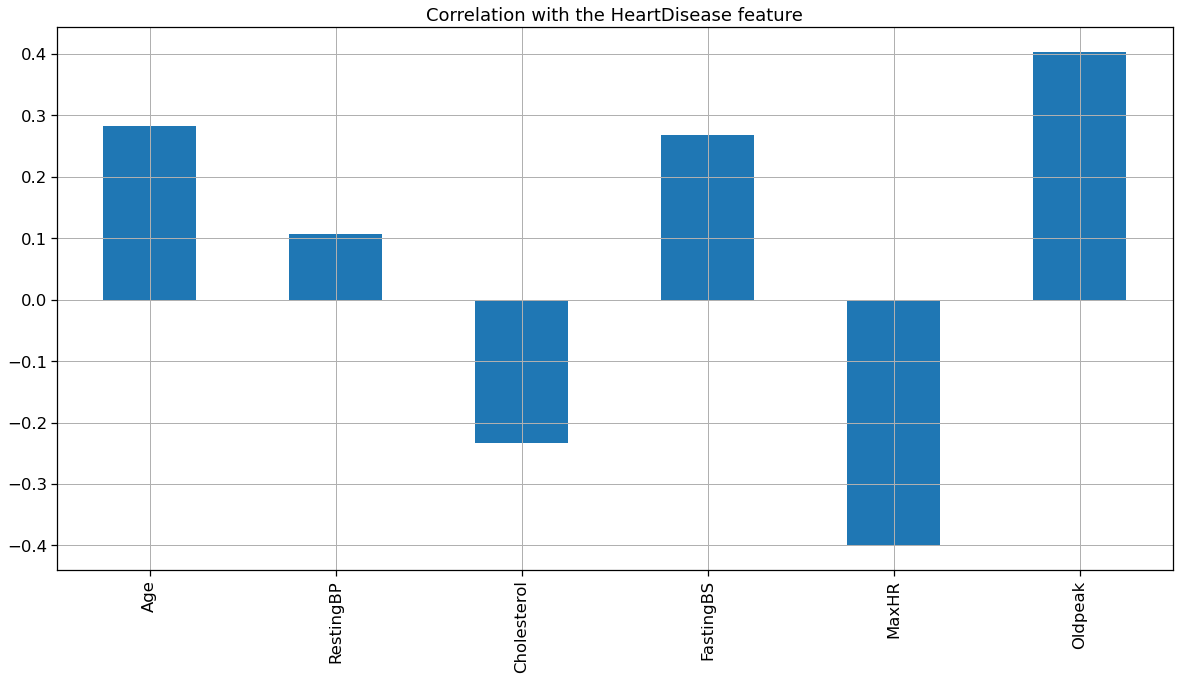

In [60]:
#Finding the correlation of all the features with the HeartDisease feature(i.e., with respect to the target feature here)

dataset.drop('HeartDisease', axis=1).corrwith(dataset.HeartDisease).plot(kind='bar', grid=True, figsize=(20, 10), title="Correlation with the HeartDisease feature")


In [ ]:
#The features 'Age','RestingBP','FastingBS' and 'Oldpeak' are positively correlated with the 'HeartDisease' feature.
#Other features i.e. Cholesterol and MaxHR are negatively correlated with the 'HeartDisease' feature.

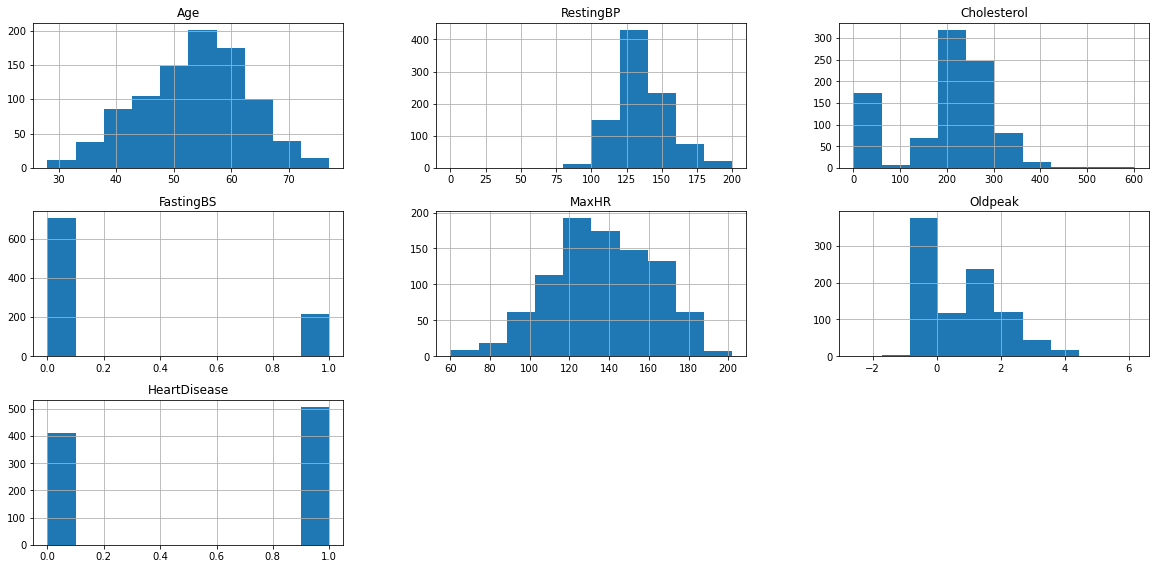

In [11]:
dataset.hist(figsize=(20,20), layout=(6,3));

In [98]:
#Histograms representation we can see the shape of each feature and provides the count of number of observations in each bin

Min Age : 28
Max Age : 77
Mean Age : 53.510893246187365


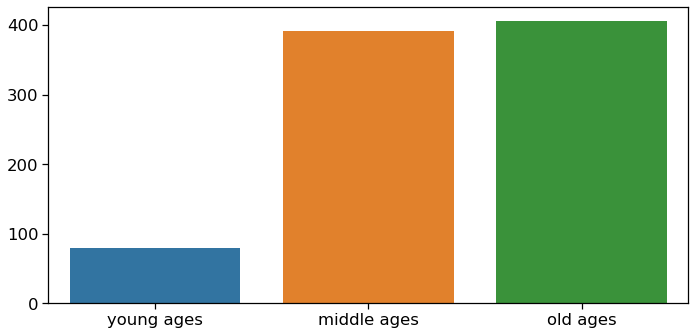

In [69]:
#" Age "
#From Above graph, we can see that for 'Age' attribute 50-60 has highest frequency.

#check range of age in dataset:
minAge=min(dataset.Age)
maxAge=max(dataset.Age)
meanAge=dataset.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

#divide in  three parts: yound, middleage,old age
Young = dataset[(dataset.Age>=29)&(dataset.Age<40)]
MiddleAge = dataset[(dataset.Age>=40)&(dataset.Age<55)]
oldAge = dataset[(dataset.Age>55)]

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','old ages'],y=[len(Young),len(MiddleAge),len(oldAge)])
plt.tight_layout()

In [ ]:
From Above graph, it is seen that the older aged people are the most affected by heart disease and young ones are the least affected.

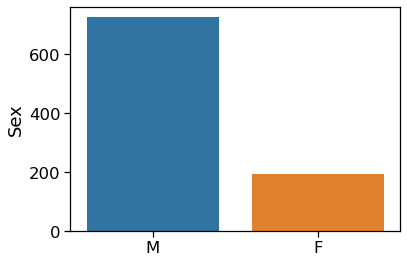

In [13]:
#'Sex' feature Analysis:

sns.barplot(x=['M','F'],y=dataset.Sex.value_counts())
plt.tight_layout()

#From above graph it is clear that Ratio of Male to Female is approxiamtely 3:1.

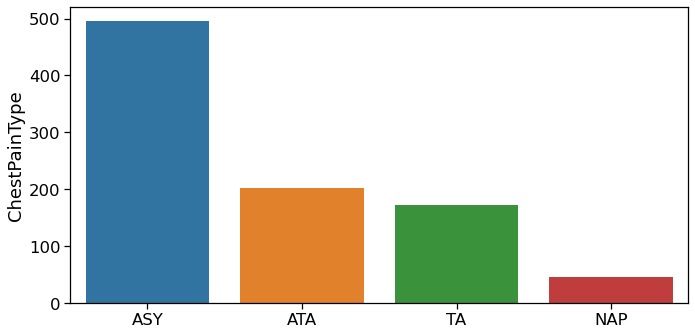

In [87]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['ASY','ATA','TA','NAP'], y=dataset.ChestPainType.value_counts(), data=dataset )
plt.tight_layout()

In [ ]:
As seen there are 4 types of chest pain: varying from condition too bad  to status as least.

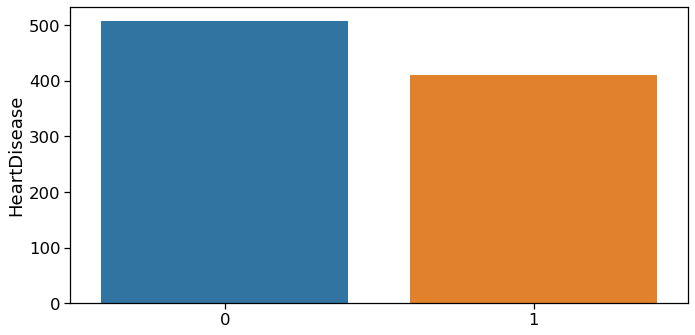

In [88]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['0','1'], y=dataset.HeartDisease.value_counts())
plt.tight_layout()

In [90]:
#The ratio between 1 and 0 is much less than 1.5 which indicates that the target(HeartDisease) feature is not imbalanced

#checking how many people have heart disease(distribution of heartDisease variable) consider it as the target
dataset['HeartDisease'].value_counts()
# 1-- No heart disease
# 2- Heart disease

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

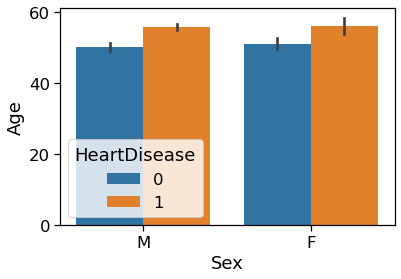

In [86]:
#Plotting relation betweeen'Sex' feature and 'Age' with respect to target(HeartDisease) :
sns.barplot(data =dataset, x='Sex', y='Age', hue='HeartDisease')

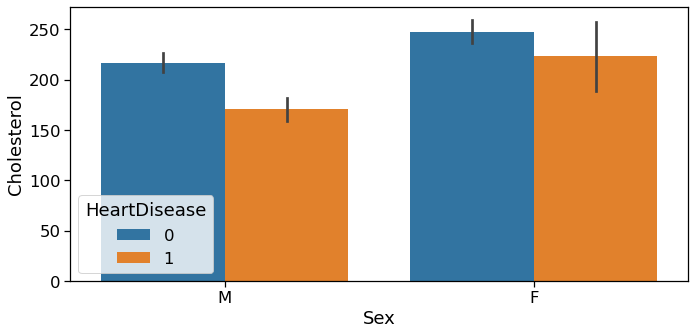

In [14]:
#Plotting relation betweeen'Sex' feature and 'Cholesterol' with respect to target(HeartDisease) :
plt.figure(figsize=(10,5))
sns.barplot(data =dataset, x='Sex', y='Cholesterol', hue='HeartDisease')
plt.tight_layout()

<AxesSubplot:xlabel='ST_Slope', ylabel='RestingBP'>

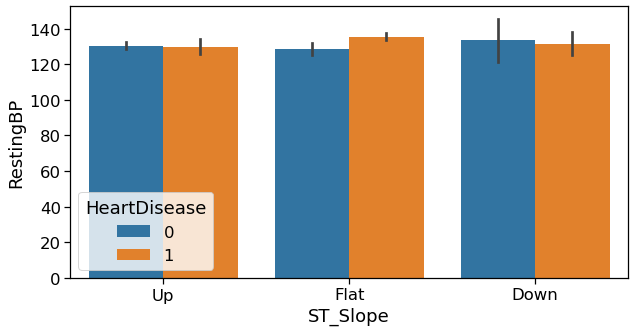

In [84]:
#Plotting relation betweeen'RestingBP' feature and 'ST_Slope' with respect to target(HeartDisease) :
plt.figure(figsize=(10,5))
sns.barplot(data =dataset, y='RestingBP', x='ST_Slope', hue='HeartDisease')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='MaxHR'>

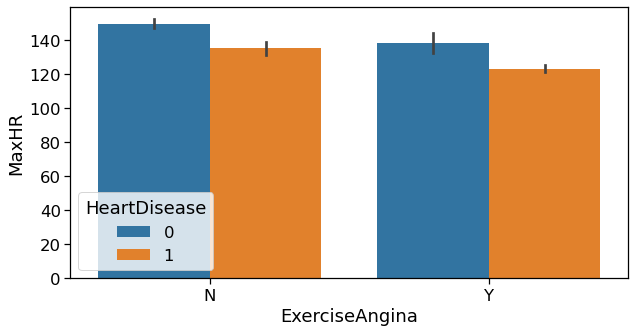

In [89]:
#Plotting relation betweeen'MaxHR' feature and ' ExerciseAngina' with respect to target(HeartDisease) :
plt.figure(figsize=(10,5))
sns.barplot(data =dataset, y='MaxHR', x='ExerciseAngina', hue='HeartDisease')

In [17]:
#get the datatypes of all the features
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [29]:
#Identifying and Handling Categorical Data

categorical_cols= dataset.select_dtypes(include=['object'])
categorical_cols.columns
for cols in categorical_cols.columns:
    print(cols,'-', len(categorical_cols[cols].unique()),'Labels')

Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels


In [11]:
#two attributes i.e. Sex and ExerciseAngina among 5 are binary i.e.,they take only 2 values: using 
#encoding function to replace with 0/1

dataset['Sex'] = np.where(dataset['Sex'] == "M", 0, 1)
dataset['ExerciseAngina'] = np.where(dataset['ExerciseAngina'] == "N", 0, 1)
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [12]:
#For attributes with 3 or more labels[i.e.,ChestPainType, RestingECG,ST_Slope ],we are using the pandas get_dummies function. 
#It will create a new attribute per label.Example: restingECG has  3 labels so,3 new attributes will be
#created with a value of either 0 or 1.

dataset=pd.get_dummies(dataset)
dataset.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [13]:
print("Before Scaling the data ")
dataset.head()

Before Scaling the data 


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [14]:
#*****Preparing Data for the Model
#Scaling the Data

print("Post Data Scaling")
standardScaler = StandardScaler()
columns_to_scale = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

Post Data Scaling


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0,0.410909,0.825070,0,1.382928,0,-0.832432,0,0,1,0,0,0,1,0,0,0,1
1,-0.478484,1,1.491752,-0.171961,0,0.754157,0,0.105664,1,0,0,1,0,0,1,0,0,1,0
2,-1.751359,0,-0.129513,0.770188,0,-1.525138,0,-0.832432,0,0,1,0,0,0,0,1,0,0,1
3,-0.584556,1,0.302825,0.139040,0,-1.132156,1,0.574711,1,1,0,0,0,0,1,0,0,1,0
4,0.051881,0,0.951331,-0.034755,0,-0.581981,0,-0.832432,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
we do scaling to bring all the values to the same magnitude. 
Scaling or Standardization is brings the mean to zero and standard deviation to ‘one’
Perform Scaling to avoid biased Prediction

In [16]:
#Splitting the target and features
X = dataset.drop(columns='HeartDisease',axis=1)
Y = dataset['HeartDisease']
#print(X)
#print(Y)

In [17]:
#Create training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state =2)

print('X_train size: ',X_train.size)
print('X_test size: ',X_test.size)
print('Y_train size: ',Y_train.size)
print('Y_test size: ',Y_test.size)

X_train size:  11556
X_test size:  4968
Y_train size:  642
Y_test size:  276


In [ ]:
Model Training:

    1.Decision Tree Classifier:

    *****DECISION TREE CLASSIFIER*****   
Prediction using GINI Index
Confusion Matrix: 
[[100  23]
 [ 13 140]]


<AxesSubplot:>

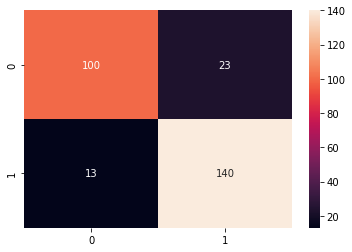

In [18]:
print("    *****DECISION TREE CLASSIFIER*****   ")
# Creating the classifier object
dc_classifier_gini = DecisionTreeClassifier(criterion = "gini",random_state = 2,max_depth=3, min_samples_leaf=5)
# Performing training
dc_classifier_gini.fit(X_train, Y_train)
#prediction using gini index
Y_pred = dc_classifier_gini.predict(X_test)
print("Prediction using GINI Index")
#print("Predicted Values: ", Y_pred)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_pred))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot =True, fmt='.4g')


In [19]:

print ("Accuracy : ",accuracy_score(Y_test,Y_pred)*100, "%")
print("Report : ")
print(classification_report(Y_test, Y_pred))

Accuracy :  86.95652173913044 %
Report : 
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       123
           1       0.86      0.92      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.87       276
weighted avg       0.87      0.87      0.87       276



In [ ]:
2.Logistic Regression

    *****Logistic Regression*****   
[[106  17]
 [ 17 136]]
Accuracy :  87.68115942028986 %


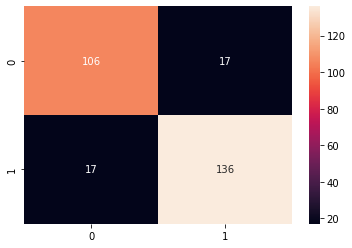

In [20]:
print("    *****Logistic Regression*****   ")
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train,Y_train)
logreg_pred = logreg_model.predict(X_test)
confmat = confusion_matrix(Y_test, logreg_pred)
print(confmat)
sns.heatmap(confmat, annot =True, fmt='.4g')

print("Accuracy : ", accuracy_score(Y_test, logreg_pred)*100, "%")

In [21]:
print("Report: ")
print(classification_report(Y_test, logreg_pred))

Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       123
           1       0.89      0.89      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [ ]:
3. k-nearest neighbor algorithm:

********K Nearest Neighbor Algorithm*********
Confusion Matrix: 
[[101  22]
 [ 11 142]]
Accuracy :  88.04347826086956 %


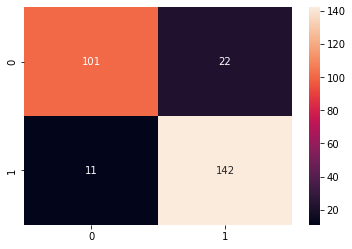

In [24]:

print("********K Nearest Neighbor Algorithm*********")
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

Y_knn = knn.predict(X_test)
#print("Predicted Values: ", Y_pred)
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, Y_knn))

#print(knn.score(X_test, Y_test))
sns.heatmap(confusion_matrix(Y_test, Y_knn), annot =True, fmt='.4g')

print("Accuracy : ", accuracy_score(Y_test, Y_knn)*100, "%")

In [23]:
print("Report: ")
print(classification_report(Y_test, Y_knn))

Report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       123
           1       0.87      0.93      0.90       153

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276



In [37]:
#Building a predictive System
#verifying for a single instance if model is predicting correct value or not 
input_data = (48,1,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0)
numpy_array = np.asarray(input_data)
input_data_reshape = numpy_array.reshape(1,-1)
asp = dc_classifier_gini.predict(input_data_reshape)
print("Predicted Heart Disease value: ", asp)

Predicted Heart Disease value:  [1]
